### This notebook contains my code for my CNN ragam classification models

In [226]:
# Dictionary containing split counts for full set of ~140 ragams.
# Will be useful when we expand the model to more than 10 ragams.

ragamSplitDic = {'Ahiri': 810, 'Abheri': 4450, 'amrutavarSiNi': 993, 'Anandabhairavi': 3111, 'AndOLikA': 1358, 'Arabhi': 2067, 'asAvEri': 0, 'aThANA': 939, 'bahudAri': 1256, 'balahamsa': 640, 'bauLi': 728, 'bEgaDA': 3171, 'behAg': 1973, 'bhairavi': 8650, 'bhUpaLaM': 1016, 'bilahari': 3053, 'bindumAlini': 1035, 'bowLi': 376, 'brundAvanasArangA': 1613, 'BrundAvani': 329, 'cakravAkam': 2164, 'candrajyOti': 1273, 'cArukEsi': 2551, 'cenjuruTi': 583, 'darbAr': 1327, 'dEsh': 943, 'dEvagAndhAri': 1296, 'dEvamanOhari': 1027, 'dhanyAsi': 2253, 'dvijAvanti': 939, 'gambhIranATai': 815, 'garuDadhvani': 621, 'gauDamalhAr': 677, 'gauLa': 141, 'gauLipantu': 723, 'ghaNTA': 889, 'hamIrkalyANi': 1748, 'hamsadhvani': 2977, 'hamsagamini': 0, 'hamsanAdam': 1057, 'hamsAnandi': 1552, 'hanumatODi': 213, 'harikAmbhOji': 3109, 'hEmavati': 3353, 'hindOLam': 1860, 'husEni': 928, 'jaganmOhini': 0, 'janaranjani': 948, 'jOnpuri': 566, 'kalyANavasantam': 1515, 'kalyANi': 14653, 'kamalamanOhari': 1048, 'kAmavardhani': 115, 'kAmavardhini': 3876, 'kAmbhOji': 132, 'kAmbOji': 9797, 'kAnaDA': 1683, 'kannaDa': 673, 'kannaDagauLa': 947, 'kApi': 3063, 'kApinArAyaNi': 0, 'karaharapriya': 2580, 'karNaranjani': 1265, 'kathanakutUhalam': 0, 'kEdAragauLa': 1703, 'kEdAram': 1194, 'khamAs': 1325, 'kharaharapriyA': 7966, 'kIravANi': 4097, 'kuntalavarALi': 498, 'kurinji': 304, 'lalitA': 2039, 'latAngi': 2841, 'madhuvanti': 549, 'madhyamAvati': 5038, 'malahari': 0, 'mALavi': 728, 'malayamArutam': 1486, 'mAND': 937, 'maNirangu': 1397, 'mAnji': 1044, 'mAyAmALavagauLa': 1378, 'mishrashivaranjani': 49, 'misrashivaranjani': 594, 'mOhanakalyANi': 1762, 'mOhanam': 5624, 'mukhAri': 1620, 'nAdanAmakriyA': 913, 'nAgasvarAvaLi': 616, 'naLinakAnti': 730, 'nArAyaNagauLa': 1151, 'nArirItigauLa': 0, 'nATa': 1593, 'naTabhairavi': 32, 'nATakapriyA': 0, 'nATTai': 1317, 'nATTakurinji': 3165, 'navarOj': 495, 'nAyaki': 928, 'nIlAmbari': 709, 'pantuvarALi': 0, 'paraju': 554, 'paras': 684, 'pashupatipriyA': 0, 'punnAgavarALi': 558, 'pUrNacandrikA': 991, 'pUrvikalyANi': 4947, 'ranjani': 2897, 'ravicandrikA': 725, 'rEvagupti': 736, 'rEvati': 1193, 'rItigauLa': 2653, 'sahAnA': 1399, 'sALagabhairavi': 733, 'sAma': 5403, 'sAramati': 0, 'sAranga': 1139, 'saurAshtram': 1277, 'saurASTra': 22, 'sAvEri': 4130, 'shankarAbharaNam': 8402, 'shaNmukhapriyA': 7557, 'shivaranjani': 89, 'shrI': 5286, 'shrIranjani': 2451, 'shubhapantuvarALi': 41, 'shuddhadhanyAsi': 1448, 'shuddhasAvEri': 1667, 'shyAmA': 1196, 'simhEndramadhyamam': 3038, 'sindubhairavi': 831, 'sourAshTram': 170, 'suraTi': 988, 'tODi': 14545, 'vAcaspati': 1773, 'valaji': 971, 'varALi': 6571, 'vasantA': 887, 'yadukulakAmbhOji': 1269, 'yamunAkalyANi': 850}
sortedRagamSplitDic = sorted(ragamSplitDic.items(), key=lambda x:x[1])

#### import required libraries and packages

In [230]:
!pip install pydub librosa music21

In [ ]:
pip install -U matplotlib

In [ ]:
pip install --upgrade numba

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import random 

In [228]:
import matplotlib.colors
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [231]:
import librosa
import librosa.display as dsp
from librosa import display as librosadisplay
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings
import soundfile as sf
warnings.filterwarnings('ignore')
import pandas as pd
import os

from IPython.display import Audio, Javascript
from scipy.io import wavfile
from pydub import AudioSegment
#import simpleaudio as sa
from pydub.playback import play
import cv2

In [3]:
import pickle

In [4]:
import keras

In [5]:
from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dropout, Flatten
from keras.optimizers import SGD
from keras.regularizers import l2

In [6]:
from keras import backend as K

In [232]:
from keras.metrics import Accuracy

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from six.moves import cPickle

import numpy as np
import matplotlib.pyplot as plt

In [233]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization, Activation

### CNN Model for binary classification between 2 ragams, achieves 96% testing accuracy below (nilambari vs. Bhupalam)

In [8]:
max_len = 256
no_of_features = 256

In [221]:
model = Sequential()
model.add(Convolution2D(32, 5, 5, padding="same", input_shape=(max_len,no_of_features, 1),kernel_initializer="lecun_uniform"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [222]:
model.add(Convolution2D(64, 5, 5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [223]:
model.add(Flatten())
model.add(Dense(512, kernel_initializer="lecun_uniform"))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(2, kernel_initializer="lecun_uniform")) #activation='softmax'
model.add(Activation("softmax"))

In [225]:
sgd = SGD(learning_rate=0.001, momentum=.9, nesterov=False)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['categorical_accuracy'])

### base CNN model for 10 ragams

In [33]:
max_len = 256
no_of_features = 256

In [26]:
model10 = Sequential()
model10.add(Convolution2D(32, 5, 5, padding="same", input_shape=(max_len,no_of_features, 1),kernel_initializer="lecun_uniform"))
model10.add(Activation('relu'))
model10.add(MaxPooling2D(pool_size=(2,2)))

In [27]:
model10.add(Convolution2D(64, 5, 5, padding='same'))
model10.add(Activation('relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))

In [28]:
model10.add(Flatten())
model10.add(Dense(512, kernel_initializer="lecun_uniform"))
model10.add(Activation('sigmoid'))
model10.add(Dropout(0.5))
model10.add(Dense(10, kernel_initializer="lecun_uniform")) #activation='softmax'
model10.add(Activation("softmax"))

In [29]:
sgd = SGD(learning_rate=0.001, momentum=.9, nesterov=False)
model10.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['categorical_accuracy'])

### Second model for 10 ragams: adding layers, dense layer, changing final activation function

In [234]:
model10Bigger = Sequential()

In [235]:
# add convolutional layers with increasing filters
model10Bigger.add(Convolution2D(32, 3, 3, padding="same", input_shape=(max_len,no_of_features, 1), kernel_initializer="he_uniform"))
model10Bigger.add(Activation('relu'))
model10Bigger.add(MaxPooling2D(pool_size=(2,2), padding="same"))

In [236]:
model10Bigger.add(Convolution2D(64, 3, 3, padding='same'))
model10Bigger.add(Activation('relu'))
model10Bigger.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

In [237]:
model10Bigger.add(Convolution2D(128, 3, 3, padding='same'))
model10Bigger.add(Activation('relu'))
model10Bigger.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

In [238]:
model10Bigger.add(Convolution2D(256, 3, 3, padding='same'))
model10Bigger.add(Activation('relu'))
model10Bigger.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

In [239]:
# add dense layers with dropout
model10Bigger.add(Flatten())
model10Bigger.add(Dense(1024, kernel_initializer="he_uniform"))
model10Bigger.add(Activation('relu'))
model10Bigger.add(Dropout(0.5))

In [240]:
model10Bigger.add(Dense(512, kernel_initializer="he_uniform"))
model10Bigger.add(Activation('relu'))
model10Bigger.add(Dropout(0.5))

In [241]:
# output layer with 10 neurons for multi-class classification
model10Bigger.add(Dense(10, kernel_initializer="he_uniform"))
model10Bigger.add(Activation("softmax"))

In [242]:
sgd = SGD(learning_rate=0.001, momentum=.9, nesterov=False)
model10Bigger.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['categorical_accuracy'])

### Even bigger 10-ragam model with early stopping and learning rate adjustment

In [14]:
model10BiggerEarly = Sequential()

In [15]:
# add convolutional layers with increasing filters
model10BiggerEarly.add(Convolution2D(32, 3, 3, padding="same", input_shape=(max_len,no_of_features, 1), kernel_initializer="he_uniform"))
#model10BiggerEarly.add(BatchNormalization())
model10BiggerEarly.add(Activation('relu'))
model10BiggerEarly.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model10BiggerEarly.add(Convolution2D(64, 3, 3, padding='same'))
#model10BiggerEarly.add(BatchNormalization())
model10BiggerEarly.add(Activation('relu'))
model10BiggerEarly.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model10BiggerEarly.add(Convolution2D(128, 3, 3, padding='same'))
#model10BiggerEarly.add(BatchNormalization())
model10BiggerEarly.add(Activation('relu'))
model10BiggerEarly.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model10BiggerEarly.add(Convolution2D(256, 3, 3, padding='same'))
#model10BiggerEarly.add(BatchNormalization())
model10BiggerEarly.add(Activation('relu'))
model10BiggerEarly.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model10BiggerEarly.add(Convolution2D(512, 3, 3, padding='same'))
#model10BiggerEarly.add(BatchNormalization())
model10BiggerEarly.add(Activation('relu'))
model10BiggerEarly.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

In [16]:
# add dense layers with dropout
model10BiggerEarly.add(Flatten())
model10BiggerEarly.add(Dense(1024, kernel_initializer="he_uniform"))
model10BiggerEarly.add(Activation('relu'))
model10BiggerEarly.add(Dropout(0.5))
model10BiggerEarly.add(Dense(512, kernel_initializer="he_uniform"))
model10BiggerEarly.add(Activation('relu'))
model10BiggerEarly.add(Dropout(0.5))

In [17]:
# output layer with 10 neurons for multi-class classification
model10BiggerEarly.add(Dense(10, kernel_initializer="he_uniform"))
model10BiggerEarly.add(Activation("softmax"))

In [18]:
# define callbacks for early stopping and reducing the learning rate
earlystop = EarlyStopping(monitor='val_loss', patience=4, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1)

In [19]:
model10BiggerEarly.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['categorical_accuracy'])

## Import data for the ten ragams

In [20]:
pickleFilePath = '/content/drive/MyDrive/N240Project/pickleFiles'
pickleDirectoryFiles = os.listdir(pickleFilePath)

In [21]:
X = []
y = []

for pick in pickleDirectoryFiles:
    pickleFile = pickleFilePath + "/" + pick
    file = open(pickleFile, "rb")
    (X1,y1) = pickle.load(file)
    file.close()
    X += X1
    y += y1

In [22]:
X = np.array(X)
y = np.array(y)

### perform train test split

In [23]:
(X_train, X_test, y_train, y_test) = train_test_split(X,y,test_size=0.1)

In [24]:
num_train_samples = X_train.shape[0]
num_test_samples = X_test.shape[0]

### Here we do mean scaled pixel-reweighting, a standard operation when working with image data

In [25]:
pixel_mean = np.zeros([max_len,no_of_features])

for i in range(0,num_train_samples):
    pixel_mean += (X_train[i]/num_train_samples)

for i in range(0,num_train_samples):
    X_train[i] -= pixel_mean

for i in range(0,num_test_samples):
    X_test[i] -= pixel_mean

X_train = X_train.reshape((num_train_samples,1,max_len,no_of_features))
X_test = X_test.reshape((num_test_samples,1,max_len,no_of_features))

### check dimensions

In [26]:
print("Training set dimensions : ", np.shape(X_train))
print("Training labels dimensions : ", np.shape(y_train))

Training set dimensions :  (15407, 1, 256, 256)
Training labels dimensions :  (15407,)


In [27]:
X_train = X_train.reshape(-1, 256, 256, 1)
X_test = X_test.reshape(-1, 256, 256, 1)

In [28]:
print("Training set dimensions : ", np.shape(X_train))
print("Training labels dimensions : ", np.shape(y_train))

Training set dimensions :  (15407, 256, 256, 1)
Training labels dimensions :  (15407,)


In [29]:
y_train

array(['mohanam', 'bhupalam', 'nilambari', ..., 'ahiri',
       'simhendramadhyamam', 'kalyanavasantam'], dtype='<U18')

### one hot encode ragam labels to correspond to digits 0-9

In [30]:
y_train10 = []
for y in y_train:
    if y == 'yamunakalyani':
        y_train10.append(0)
    if y == 'simhendramadhyamam':
        y_train10.append(1)
    if y == 'revati':
        y_train10.append(2)
    if y == 'nilambari':
        y_train10.append(3)
    if y == 'mohanam':
        y_train10.append(4)
    if y == 'manirangu':
        y_train10.append(5)
    if y == 'kalyanavasantam':
        y_train10.append(6)
    if y == 'bhupalam':
        y_train10.append(7)
    if y == 'amrutavarsini':
        y_train10.append(8)
    if y == 'ahiri':
        y_train10.append(9)

y_train10 = np.array(y_train10)

In [31]:
len(y_train10)

15407

In [32]:
num_classes = 10 #number of classes, here is 10 (0,1,...,9)
train_y = keras.utils.to_categorical(y_train10, num_classes)

In [33]:
model10BiggerEarly

In [34]:
X_train.shape

(15407, 256, 256, 1)

### Fit bigger 10-ragam model to data

In [243]:
history10Bigger = model10Bigger.fit(X_train, train_y, batch_size=10, epochs=20, validation_split=0.1)

Epoch 1/20
1387/1387 [==============================] - 22s 15ms/step - loss: 2.0393 - categorical_accuracy: 0.3307 - val_loss: 1.8183 - val_categorical_accuracy: 0.3894
Epoch 2/20
1387/1387 [==============================] - 21s 15ms/step - loss: 1.6417 - categorical_accuracy: 0.4579 - val_loss: 1.3386 - val_categorical_accuracy: 0.5496
Epoch 3/20
1387/1387 [==============================] - 21s 15ms/step - loss: 1.3065 - categorical_accuracy: 0.5803 - val_loss: 1.1552 - val_categorical_accuracy: 0.6249
Epoch 4/20
1387/1387 [==============================] - 20s 15ms/step - loss: 1.0311 - categorical_accuracy: 0.6744 - val_loss: 0.8916 - val_categorical_accuracy: 0.7197
Epoch 5/20
1387/1387 [==============================] - 20s 15ms/step - loss: 0.8106 - categorical_accuracy: 0.7521 - val_loss: 0.7352 - val_categorical_accuracy: 0.7644
Epoch 6/20
1387/1387 [==============================] - 20s 15ms/step - loss: 0.6507 - categorical_accuracy: 0.8047 - val_loss: 0.6374 - val_categoric

## Fit bigger 10-ragam model with early stopping and adjusting learning rate to data

In [31]:
history10BiggerEarly = model10BiggerEarly.fit(X_train, train_y, batch_size=10, epochs=20, validation_split=0.1)

Epoch 1/20
1387/1387 [==============================] - 25s 17ms/step - loss: 1.9944 - categorical_accuracy: 0.3581 - val_loss: 1.7433 - val_categorical_accuracy: 0.4341
Epoch 2/20
1387/1387 [==============================] - 22s 16ms/step - loss: 1.5851 - categorical_accuracy: 0.4849 - val_loss: 1.3558 - val_categorical_accuracy: 0.5548
Epoch 3/20
1387/1387 [==============================] - 22s 16ms/step - loss: 1.2124 - categorical_accuracy: 0.6163 - val_loss: 1.0744 - val_categorical_accuracy: 0.6353
Epoch 4/20
1387/1387 [==============================] - 22s 16ms/step - loss: 0.9293 - categorical_accuracy: 0.7107 - val_loss: 0.7724 - val_categorical_accuracy: 0.7579
Epoch 5/20
1387/1387 [==============================] - 22s 16ms/step - loss: 0.7944 - categorical_accuracy: 0.7619 - val_loss: 0.7448 - val_categorical_accuracy: 0.7768
Epoch 6/20
1387/1387 [==============================] - 22s 16ms/step - loss: 0.6373 - categorical_accuracy: 0.8093 - val_loss: 0.6643 - val_categoric

### pass 2

In [31]:
history10BiggerEarly2 = model10BiggerEarly.fit(X_train, train_y, batch_size=10, epochs=20, validation_split=0.1)

Epoch 1/20
1387/1387 [==============================] - 27s 18ms/step - loss: 2.0667 - categorical_accuracy: 0.3252 - val_loss: 1.7553 - val_categorical_accuracy: 0.4192
Epoch 2/20
1387/1387 [==============================] - 23s 17ms/step - loss: 1.6680 - categorical_accuracy: 0.4562 - val_loss: 1.3758 - val_categorical_accuracy: 0.5522
Epoch 3/20
1387/1387 [==============================] - 23s 17ms/step - loss: 1.2395 - categorical_accuracy: 0.6046 - val_loss: 1.0227 - val_categorical_accuracy: 0.6652
Epoch 4/20
1387/1387 [==============================] - 23s 17ms/step - loss: 0.9409 - categorical_accuracy: 0.7099 - val_loss: 0.7795 - val_categorical_accuracy: 0.7528
Epoch 5/20
1387/1387 [==============================] - 24s 17ms/step - loss: 0.7371 - categorical_accuracy: 0.7786 - val_loss: 0.6448 - val_categorical_accuracy: 0.7982
Epoch 6/20
1387/1387 [==============================] - 23s 17ms/step - loss: 0.6047 - categorical_accuracy: 0.8193 - val_loss: 0.5169 - val_categoric

### pass 3

In [35]:
history10BiggerEarly3 = model10BiggerEarly.fit(X_train, train_y, batch_size=10, epochs=20, validation_split=0.1)

Epoch 1/20
1387/1387 [==============================] - 26s 17ms/step - loss: 1.9749 - categorical_accuracy: 0.3351 - val_loss: 1.7755 - val_categorical_accuracy: 0.3978
Epoch 2/20
1387/1387 [==============================] - 23s 17ms/step - loss: 1.6713 - categorical_accuracy: 0.4394 - val_loss: 1.5177 - val_categorical_accuracy: 0.5029
Epoch 3/20
1387/1387 [==============================] - 23s 17ms/step - loss: 1.3242 - categorical_accuracy: 0.5770 - val_loss: 1.1345 - val_categorical_accuracy: 0.6398
Epoch 4/20
1387/1387 [==============================] - 23s 16ms/step - loss: 1.0458 - categorical_accuracy: 0.6754 - val_loss: 1.0074 - val_categorical_accuracy: 0.6911
Epoch 5/20
1387/1387 [==============================] - 23s 16ms/step - loss: 0.8657 - categorical_accuracy: 0.7381 - val_loss: 0.8657 - val_categorical_accuracy: 0.7313
Epoch 6/20
1387/1387 [==============================] - 23s 16ms/step - loss: 0.7310 - categorical_accuracy: 0.7803 - val_loss: 0.7289 - val_categoric

### Process the testing data similarily

In [33]:
y_test.shape

(1712,)

In [33]:
#y_test = np.squeeze(y_test, axis=1)

In [34]:
X_test.shape

(1712, 256, 256, 1)

In [35]:
y_test10 = []
for y in y_test:
    if y == 'yamunakalyani':
        y_test10.append(0)
    if y == 'simhendramadhyamam':
        y_test10.append(1)
    if y == 'revati':
        y_test10.append(2)
    if y == 'nilambari':
        y_test10.append(3)
    if y == 'mohanam':
        y_test10.append(4)
    if y == 'manirangu':
        y_test10.append(5)
    if y == 'kalyanavasantam':
        y_test10.append(6)
    if y == 'bhupalam':
        y_test10.append(7)
    if y == 'amrutavarsini':
        y_test10.append(8)
    if y == 'ahiri':
        y_test10.append(9)

y_test10 = np.array(y_test10)

In [36]:
len(y_test10)

1712

In [37]:
num_classes = 10 #number of classes, here is 10 (0,1,...,9)
test_y = keras.utils.to_categorical(y_test10, num_classes)

In [38]:
score = model10BiggerEarly.evaluate(X_test, test_y, verbose=1)

54/54 [==============================] - 1s 9ms/step - loss: 0.4004 - categorical_accuracy: 0.8908


In [40]:
X_test.shape

(1712, 256, 256, 1)

### Conduct predictions on testing data

In [42]:
y_pred = model10BiggerEarly.predict(X_test)

54/54 [==============================] - 1s 9ms/step


In [43]:
y_pred[0]

array([9.9978447e-01, 2.3606603e-05, 7.0145179e-09, 1.4455544e-06,
       1.8034999e-04, 8.9084011e-07, 1.3060760e-07, 3.1146678e-06,
       5.9228851e-06, 9.0503065e-08], dtype=float32)

# Test Data Performance Visualizations

## Graph ROC Curve

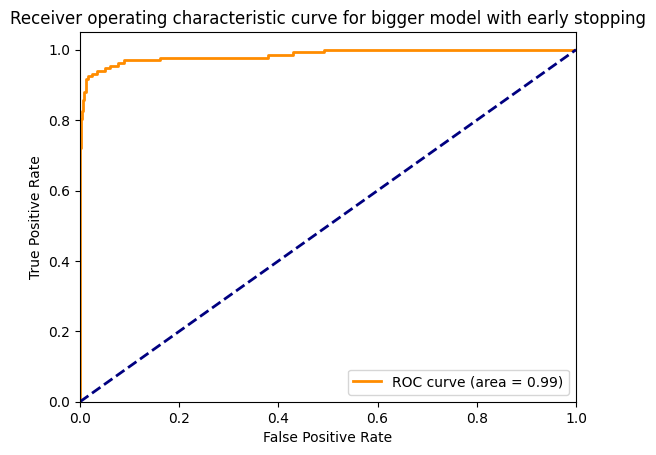

In [65]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for bigger model with early stopping')
plt.legend(loc="lower right")
plt.show()

## Plot Confusion Matrices

In [44]:
conf_mat = confusion_matrix(np.argmax(y_pred, axis=1), y_test10)

<ipython-input-63-4b53d756ba6c>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn')


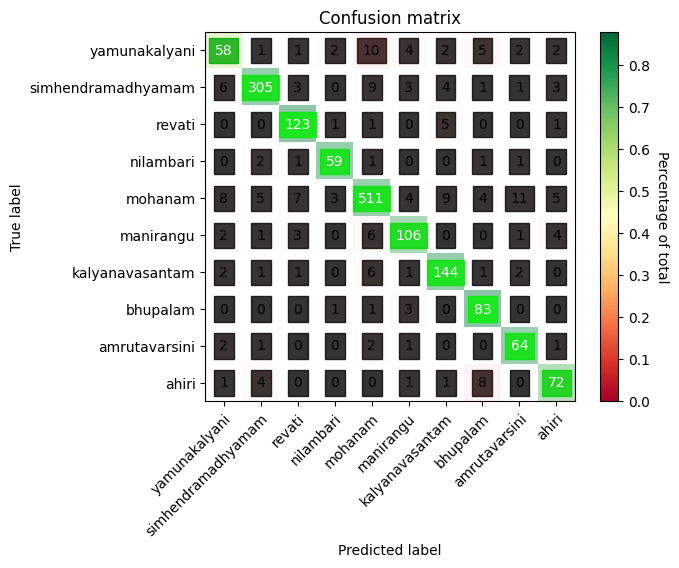

In [63]:
class_names = ['yamunakalyani', 'simhendramadhyamam', 'revati', 'nilambari', 'mohanam', 'manirangu', 'kalyanavasantam', 'bhupalam', 'amrutavarsini', 'ahiri']

# Calculate the percentages of each category
total_per_category = np.sum(conf_mat, axis=1)
conf_mat_percent = conf_mat / total_per_category[:, np.newaxis] * 100

# Create a figure object and subplot
fig, ax = plt.subplots()

# Create the colormap and modify the transparency based on the percentage
cmap = plt.cm.get_cmap('RdYlGn')
colors = cmap(conf_mat_percent / 100)
colors[:, :, -1] = conf_mat_percent / 200  # Set the alpha based on the percentage
im = ax.imshow(colors, interpolation='nearest', cmap=cmap)

# Add color bar and labels
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Percentage of total', rotation=-90, va="bottom")
ax.set(xticks=np.arange(conf_mat.shape[1]),
       yticks=np.arange(conf_mat.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        # Set the color of the cell based on the size of the raw numbers
        if i == j:
            color = (0, conf_mat_percent[i, j]/100, 0)
        else:
            color = (conf_mat_percent[i, j]/100, 0, 0)
        ax.text(j, i, format(conf_mat[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_mat_percent[i, j] > 50 else "black",
                bbox={'facecolor': color, 'alpha':0.8, 'edgecolor': color})

# Show the plot
plt.show()


## Another confusion matrix

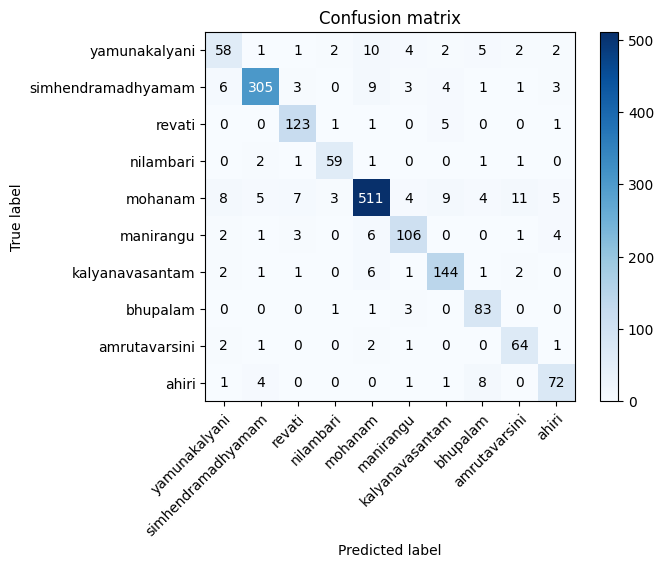

In [69]:
class_names = ['yamunakalyani', 'simhendramadhyamam', 'revati', 'nilambari', 'mohanam', 'manirangu', 'kalyanavasantam', 'bhupalam', 'amrutavarsini', 'ahiri']

# Create a figure object and subplot
fig, ax = plt.subplots()

# Create the heatmap
im = ax.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)

# Add color bar and labels
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_mat.shape[1]),
       yticks=np.arange(conf_mat.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
thresh = conf_mat.max() / 2.
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(j, i, format(conf_mat[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_mat[i, j] > thresh else "black")

# Show the plot
plt.show()

# Live Demo of Ragam Recognition Model
### Here we will randomly select an audio clip from my library of music and see if the model can correctly identify the ragam of the song playing in that clip.

In [175]:
# Pick a random ragam

ragamLibrary = ['yamunakalyani', 'simhendramadhyamam', 'revati', 'nilambari', 'mohanam', 'manirangu', 'kalyanavasantam', 'bhupalam', 'amrutavarsini', 'ahiri']
randomRagamIndex = random.randint(0, 9)

print("The selected ragam for the demo is: ", ragamLibrary[randomRagamIndex])


The selected ragam for the demo is:  manirangu


In [176]:
# Pick a random track

splitNumber = random.randint(0,600)

print("We will now see if the model can correctly classify track #", str(splitNumber) + " from our library of \n Carnatic music clips in the ragam " + ragamLibrary[randomRagamIndex] + " as actually being in the ragam " + ragamLibrary[randomRagamIndex])

We will now see if the model can correctly classify track # 395 from our library of 
 Carnatic music clips in the ragam manirangu as actually being in the ragam manirangu


#### Now we load in the audio clip we have selected

In [108]:
chosenRagam = ragamLibrary[randomRagamIndex]

In [181]:
uploaded_file_name = '/content/drive/MyDrive/N240Project/RagamSplits3/' + chosenRagam + '/' + chosenRagam + '_split_' + str(splitNumber)

### Here we load in a clip of me singing a melody in Manirangu, unseen by the model during training and recorded on my phone's voice memos app minutes before the demo.

In [207]:
recorded_file_name = '/content/drive/MyDrive/N240Project/Manirangu.m4a'

#### Now we prepare the selected track for the model, adjusting the sample rate.

In [128]:
EXPECTED_SAMPLE_RATE = 16000
MAX_ABS_INT16 = 32768.0

In [129]:
def convert_audio_for_model(user_file, output_file='converted_audio_file.wav'):
  audio = AudioSegment.from_file(user_file)
  audio = audio.set_frame_rate(EXPECTED_SAMPLE_RATE).set_channels(1)
  audio.export(output_file, format="wav")
  return output_file

In [246]:
converted_uploaded_file = convert_audio_for_model(uploaded_file_name)

In [208]:
converted_recorded_file = convert_audio_for_model(recorded_file_name)

#### Here is what the clip that we have randomly selected sounds like.

In [247]:
Audio(converted_uploaded_file)

### Here is what the clip of me singing sounds like.

In [244]:
Audio(converted_recorded_file)

#### Now we compute a mel-spectrogram for the clip we have selected.

In [210]:
#function computes mel-spectrogram for the selected clip

def MELplot_stft(x, sample_rate):

  x_stft = np.abs(librosa.stft(x, n_fft=2048))**2

  S = librosa.feature.melspectrogram(S=x_stft)
  S = librosa.power_to_db(S, ref=np.max)

  new_shape = (256,256)
  resized_arr = cv2.resize(S, new_shape)

  return resized_arr

### We do the process below for the uploaded file, switch out the argument below to the recorded file if you wish to try.

In [211]:
sample_rate, audio_samples = wavfile.read(converted_uploaded_file, 'rb')

melSpec = MELplot_stft(audio_samples/MAX_ABS_INT16, sample_rate=EXPECTED_SAMPLE_RATE)

In [212]:
melSpec

array([[-80.        , -77.64870083, -71.48362285, ..., -58.06565964,
        -52.69197157, -56.21796921],
       [-79.83146764, -75.39107061, -69.6124843 , ..., -55.92703136,
        -49.79560932, -52.87449132],
       [-79.49440293, -70.87581016, -65.8702072 , ..., -51.64977479,
        -44.00288484, -46.18753555],
       ...,
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ]])

#### We will now visualize the mel spectrogram printed above

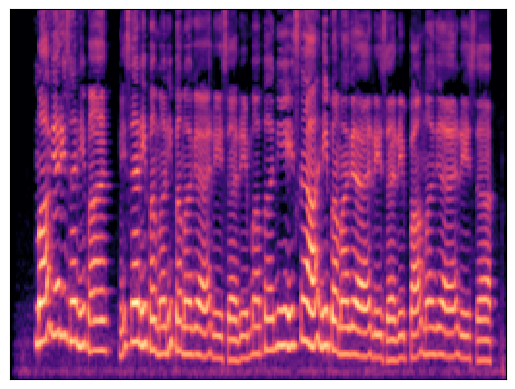

In [213]:
librosa.display.specshow(melSpec, fmax=8000)

#### We will now use the model to predict the ragam of this mel spectrogram.

In [214]:
melSpec.shape

(256, 256)

In [215]:
Xdemo = []
Xdemo.append(melSpec)

In [216]:
Xdemo = np.array(Xdemo)
Xdemo.shape

(1, 256, 256)

In [217]:
Xdemo = Xdemo.reshape((1, 256, 256, 1))

In [218]:
demonstrationPrediction = model10BiggerEarly.predict(Xdemo)

1/1 [==============================] - 0s 30ms/step


In [219]:
demonstrationPrediction

array([[5.0747711e-02, 1.4210109e-02, 3.1285547e-04, 4.3068612e-03,
        4.2046579e-03, 9.0112388e-01, 3.5104959e-03, 2.1207415e-02,
        5.3975902e-05, 3.2198132e-04]], dtype=float32)

#### As you can see, the prediction output contains probabilities for each of the ten ragams. We take the highest probability ragam as the model prediction for the task of classifying the audio clip we have selected.

In [220]:
predictionIndex = np.argmax(demonstrationPrediction[0])

print("Our model has classified the song playing in this clip as being in the ragam", ragamLibrary[predictionIndex])

Our model has classified the song playing in this clip as being in the ragam manirangu


### Model has correctly classified.

# End of Live Demonstration

# Binary classification approach below: Between Nilambari and Bhupalam

In [ ]:
file = open("/content/drive/MyDrive/N240Project/pickleFiles/bhupalam.pickle","rb")
(X1,y1) = cPickle.load(file)
file.close()

In [ ]:
file = open("/content/drive/MyDrive/N240Project/pickleFiles/nilambari.pickle","rb")
(X2,y2) = cPickle.load(file)
file.close()

In [ ]:
X= X1+ X2
y = y1+y2

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X,y,test_size=0.1)

In [ ]:
num_train_samples = X_train.shape[0]
num_test_samples = X_test.shape[0]

In [ ]:
pixel_mean = np.zeros([max_len,no_of_features])

for i in range(0,num_train_samples):
    pixel_mean += (X_train[i]/num_train_samples)

for i in range(0,num_train_samples):
    X_train[i] -= pixel_mean

for i in range(0,num_test_samples):
    X_test[i] -= pixel_mean

X_train = X_train.reshape((num_train_samples,1,max_len,no_of_features))
X_test = X_test.reshape((num_test_samples,1,max_len,no_of_features))

In [ ]:
print("Training set dimensions : ", np.shape(X_train))
print("Training labels dimensions : ", np.shape(y_train))

Training set dimensions :  (1521, 1, 256, 256)
Training labels dimensions :  (1521,)


In [ ]:
X_train = X_train.reshape(-1, 256, 256, 1)
X_test = X_test.reshape(-1, 256, 256, 1)


In [ ]:
print("Training set dimensions : ", np.shape(X_train))
print("Training labels dimensions : ", np.shape(y_train))

Training set dimensions :  (1521, 256, 256, 1)
Training labels dimensions :  (1521,)


In [ ]:
y_train

array(['nilambari', 'bhupalam', 'nilambari', ..., 'bhupalam', 'nilambari',
       'bhupalam'], dtype='<U9')

In [ ]:
y_train01 = []
for y in y_train:
    if y == 'bhupalam':
        y_train01.append(0)
    else:
        y_train01.append(1)

y_train01 = np.array(y_train01)

In [ ]:
num_classes = 2 #number of classes, here is 10 (0,1,...,9)
train_y = keras.utils.to_categorical(y_train01, num_classes)
#test_y = keras.utils.to_categorical(test_y, num_classes)

In [ ]:
model

In [ ]:
X_train.shape

(1521, 256, 256, 1)

In [ ]:
history1 = model.fit(X_train, train_y, batch_size=10, epochs=20, validation_split=0.1)

Epoch 1/20
137/137 [==============================] - 7s 41ms/step - loss: 0.7948 - categorical_accuracy: 0.5380 - val_loss: 0.6761 - val_categorical_accuracy: 0.5817
Epoch 2/20
137/137 [==============================] - 5s 40ms/step - loss: 0.7535 - categorical_accuracy: 0.5548 - val_loss: 0.6796 - val_categorical_accuracy: 0.5817
Epoch 3/20
137/137 [==============================] - 7s 53ms/step - loss: 0.7190 - categorical_accuracy: 0.5614 - val_loss: 0.6706 - val_categorical_accuracy: 0.5817
Epoch 4/20
137/137 [==============================] - 5s 35ms/step - loss: 0.7097 - categorical_accuracy: 0.5658 - val_loss: 0.6782 - val_categorical_accuracy: 0.5359
Epoch 5/20
137/137 [==============================] - 6s 43ms/step - loss: 0.7115 - categorical_accuracy: 0.5614 - val_loss: 0.6578 - val_categorical_accuracy: 0.5817
Epoch 6/20
137/137 [==============================] - 10s 71ms/step - loss: 0.6722 - categorical_accuracy: 0.6075 - val_loss: 0.6536 - val_categorical_accuracy: 0.58

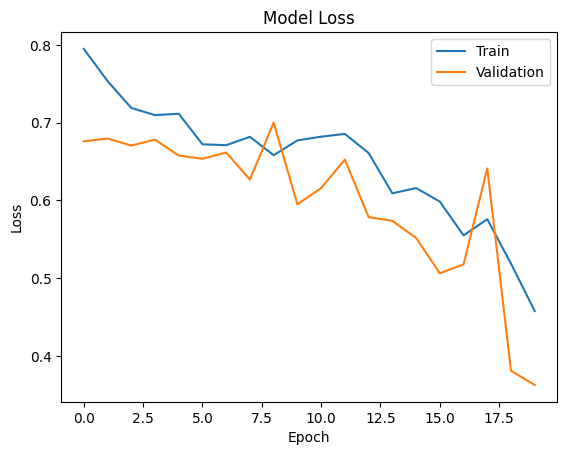

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

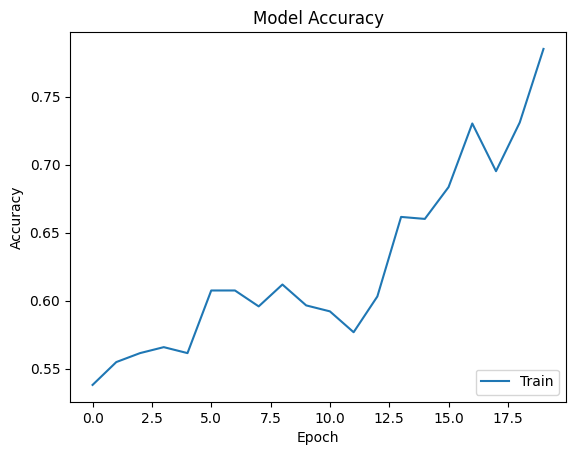

In [ ]:
plt.plot(history1.history['categorical_accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
#plt.ylim([.95, 1])
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
y_test.shape

(169,)

In [ ]:
y_test = np.squeeze(y_test, axis=1)

In [ ]:
X_test.shape

(169, 256, 256, 1)

In [ ]:
y_test01 = []
for y in y_test:
    if y == 'bhupalam':
        y_test01.append(0)
    else:
        y_test01.append(1)

y_test01 = np.array(y_test01)

In [ ]:
num_classes = 2 #number of classes, here is 10 (0,1,...,9)
test_y = keras.utils.to_categorical(y_test01, num_classes)

In [ ]:
score = model.evaluate(X_test, test_y, verbose=1)

6/6 [==============================] - 0s 34ms/step - loss: 0.1658 - categorical_accuracy: 0.9290


In [ ]:
print('Test loss:', score[0])

print("Test accuracy : ", score[1]);

Test loss: 0.1657603234052658
Test accuracy :  0.9289940595626831


In [ ]:
history = model.fit(X_train, train_y, batch_size=10, epochs=20, validation_split=0.1)

Epoch 1/20
137/137 [==============================] - 7s 49ms/step - loss: 0.0168 - categorical_accuracy: 0.9949 - val_loss: 0.1222 - val_categorical_accuracy: 0.9608
Epoch 2/20
137/137 [==============================] - 5s 36ms/step - loss: 0.0040 - categorical_accuracy: 1.0000 - val_loss: 0.1243 - val_categorical_accuracy: 0.9608
Epoch 3/20
137/137 [==============================] - 7s 51ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.1249 - val_categorical_accuracy: 0.9739
Epoch 4/20
137/137 [==============================] - 6s 41ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.1410 - val_categorical_accuracy: 0.9739
Epoch 5/20
137/137 [==============================] - 5s 35ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.1461 - val_categorical_accuracy: 0.9673
Epoch 6/20
137/137 [==============================] - 7s 54ms/step - loss: 7.9362e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1529 - val_categorical_accuracy: 0

In [ ]:
score = model.evaluate(X_test, test_y, verbose=1)

6/6 [==============================] - 0s 27ms/step - loss: 0.1472 - categorical_accuracy: 0.9586


In [ ]:
print('Test loss:', score[0])
print("Test accuracy : ", score[1]);

Test loss: 0.14719602465629578
Test accuracy :  0.9585798978805542


### CNN Model is achieving 96% classification accuracy on 2-ragam model.

In [ ]:
bhupalamPicsPath = '/content/drive/MyDrive/N240Project/RagamSpectrograms/bhupalam'
nilambariPicsPath = '/content/drive/MyDrive/N240Project/RagamSpectrograms/nilambari'

bhupalamPics = os.listdir(bhupalamPicsPath)
nilambariPics = os.listdir(nilambariPicsPath)

### Example split spectrogram

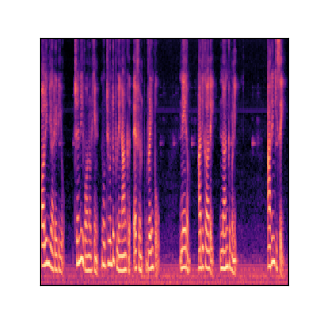

In [ ]:
img = Image.open('/content/drive/MyDrive/N240Project/RagamSpectrograms/bhupalam/bhUpaLaM_split_1.png')
img.show()